In [145]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [190]:
# load the dataset from csv format
df = pd.read_csv('filtered_alerts_unsw_production-14-12-2020.csv')

In [10]:
df.head()

time         device_mac  device_type  \
0  2020-10-26 05:22:50.532000+00:00  0c:75:bd:12:69:e1            2   
1  2020-10-26 05:23:22.572000+00:00  0c:75:bd:12:69:e1            2   
2  2020-10-26 05:23:53.546000+00:00  0c:75:bd:12:69:e1            2   
3  2020-10-26 05:38:35.162000+00:00  ac:cc:8e:b3:42:23            1   
4  2020-10-26 05:39:10.168000+00:00  ac:cc:8e:b3:42:23            1   

  remote_endpoint            eth_src            eth_dst eth_type  \
0    129.94.2.135  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800   
1    129.94.2.135  00:24:f7:18:a4:41  b4:0c:25:ec:40:11   0x0800   
2    129.94.2.135  00:24:f7:18:a4:41  b4:0c:25:ec:40:11   0x0800   
3    129.94.2.135  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800   
4    129.94.2.135  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800   

         ip_src        ip_dst  ip_proto  src_port  dst_port  packet_count  \
0  129.94.2.135  10.196.0.173         6     47482        22             1   
1  129.94.2.135  10.196.0.173         6     47500        22             5   
2  129.94.2.135  10.196.0.173         6     47500        22             1   
3  129.94.2.135  10.196.3.165         6     34392        22             1   
4  129.94.2.135  10.196.3.165         6     34406        22             1   

   byte_count                      threat_name  \
0          66  Probing from untrusted endpoint   
1         330  Probing from untrusted endpoint   
2          66  Probing from untrusted endpoint   
3          66  Probing from untrusted endpoint   
4          66  Probing from untrusted endpoint   

                                  threat_description  
0  Probing towards port tcp port 22 - The Secure ...  
1  Probing towards port tcp port 22 - The Secure ...  
2  Probing towards port tcp port 22 - The Secure ...  
3  Probing towards port tcp port 22 - The Secure ...  
4  Probing towards port tcp port 22 - The Secure ...

In [12]:
ProfileReport(df)

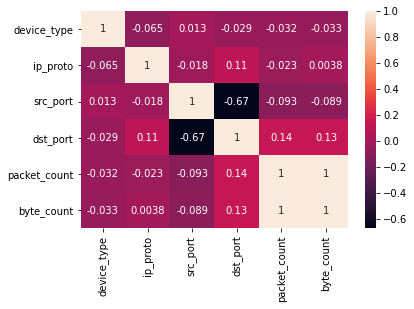

In [77]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

2    8328
1    1541
Name: device_type, dtype: int64


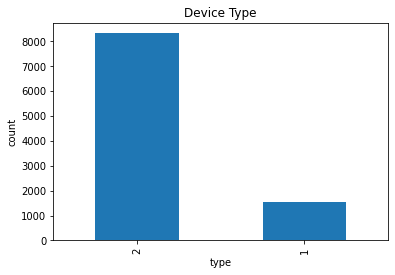

In [8]:
# analysing the device types
print(df['device_type'].value_counts())
plt.title('Device Type')
plt.xlabel('type')
plt.ylabel('count')
df['device_type'].value_counts().plot.bar()

129.94.3.151    8702
129.94.2.135     993
224.0.0.251      157
10.195.192.1       9
168.95.1.1         8
Name: remote_endpoint, dtype: int64


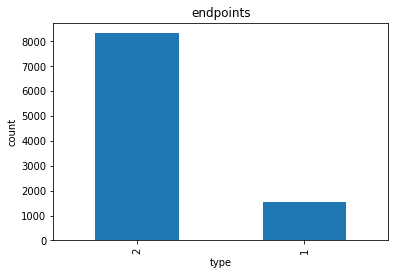

In [21]:
print(df['remote_endpoint'].value_counts())
plt.title('endpoints')
plt.xlabel('type')
plt.ylabel('count')
df['device_type'].value_counts().plot.bar()

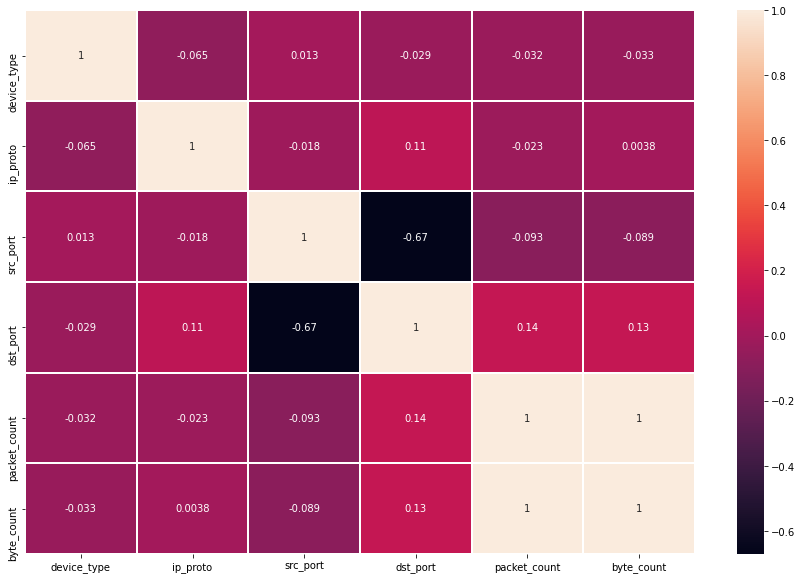

In [123]:
corrMatrix = df.corr()
plt.figure(figsize = (15,10))
sn.heatmap(corrMatrix,linewidths=1, annot=True)
plt.show()

In [142]:
df.head()

time         device_mac  device_type  \
0  2020-10-26 05:22:50.532000+00:00  0c:75:bd:12:69:e1            2   
1  2020-10-26 05:23:22.572000+00:00  0c:75:bd:12:69:e1            2   
2  2020-10-26 05:23:53.546000+00:00  0c:75:bd:12:69:e1            2   
3  2020-10-26 05:38:35.162000+00:00  ac:cc:8e:b3:42:23            1   
4  2020-10-26 05:39:10.168000+00:00  ac:cc:8e:b3:42:23            1   

  remote_endpoint            eth_src            eth_dst eth_type  ip_src  \
0    129.94.2.135  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800       0   
1    129.94.2.135  00:24:f7:18:a4:41  b4:0c:25:ec:40:11   0x0800       0   
2    129.94.2.135  00:24:f7:18:a4:41  b4:0c:25:ec:40:11   0x0800       0   
3    129.94.2.135  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800       0   
4    129.94.2.135  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800       0   

         ip_dst  ip_proto  src_port  dst_port  packet_count  byte_count  \
0  10.196.0.173         6     47482        22             1          66   
1  10.196.0.173         6     47500        22             5         330   
2  10.196.0.173         6     47500        22             1          66   
3  10.196.3.165         6     34392        22             1          66   
4  10.196.3.165         6     34406        22             1          66   

                       threat_name  \
0  Probing from untrusted endpoint   
1  Probing from untrusted endpoint   
2  Probing from untrusted endpoint   
3  Probing from untrusted endpoint   
4  Probing from untrusted endpoint   

                                  threat_description  
0  Probing towards port tcp port 22 - The Secure ...  
1  Probing towards port tcp port 22 - The Secure ...  
2  Probing towards port tcp port 22 - The Secure ...  
3  Probing towards port tcp port 22 - The Secure ...  
4  Probing towards port tcp port 22 - The Secure ...

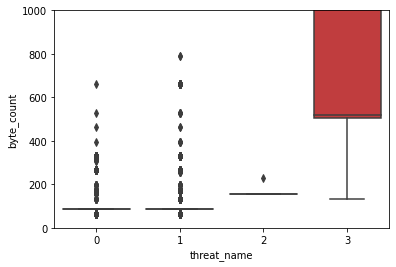

In [169]:
plt.ylim(0,1000)
sn.boxplot(x='threat_name', y='byte_count', data=df)
#{'Probing from untrusted endpoint': 0, 'Probing from untrusted remote host': 1, 'Probing to untrusted remote host': 2,
#'Probing to untrusted local device': 3}

In [191]:
obj_list = ['remote_endpoint', 'ip_src', 'ip_dst', 'threat_name', 'threat_description']
data = df.copy()
for obj in obj_list:
    tn = data[obj].unique()
    tn_dict = dict(zip(tn, range(len(tn))))
    data[obj]=data[obj].replace(tn_dict)


In [184]:
data.head()

time         device_mac  device_type  \
0  2020-10-26 05:22:50.532000+00:00  0c:75:bd:12:69:e1            2   
1  2020-10-26 05:23:22.572000+00:00  0c:75:bd:12:69:e1            2   
2  2020-10-26 05:23:53.546000+00:00  0c:75:bd:12:69:e1            2   
3  2020-10-26 05:38:35.162000+00:00  ac:cc:8e:b3:42:23            1   
4  2020-10-26 05:39:10.168000+00:00  ac:cc:8e:b3:42:23            1   

   remote_endpoint            eth_src            eth_dst eth_type  ip_src  \
0                0  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800       0   
1                0  00:24:f7:18:a4:41  b4:0c:25:ec:40:11   0x0800       0   
2                0  00:24:f7:18:a4:41  b4:0c:25:ec:40:11   0x0800       0   
3                0  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800       0   
4                0  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800       0   

   ip_dst  ip_proto  src_port  dst_port  packet_count  byte_count  \
0       0         6     47482        22             1          66   
1       0         6     47500        22             5         330   
2       0         6     47500        22             1          66   
3       1         6     34392        22             1          66   
4       1         6     34406        22             1          66   

   threat_name  threat_description  
0            0                   0  
1            0                   0  
2            0                   0  
3            0                   0  
4            0                   0

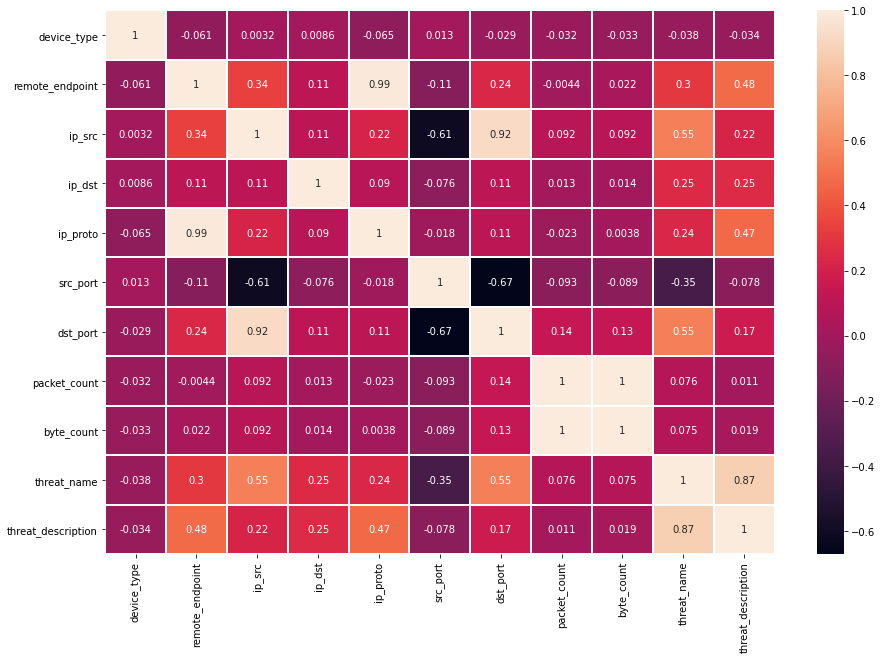

In [192]:
corrMatrix = data.corr()
plt.figure(figsize = (15,10))
sn.heatmap(corrMatrix,linewidths=1, annot=True)
plt.show()

In [194]:
df.head()

time         device_mac  device_type  \
0  2020-10-26 05:22:50.532000+00:00  0c:75:bd:12:69:e1            2   
1  2020-10-26 05:23:22.572000+00:00  0c:75:bd:12:69:e1            2   
2  2020-10-26 05:23:53.546000+00:00  0c:75:bd:12:69:e1            2   
3  2020-10-26 05:38:35.162000+00:00  ac:cc:8e:b3:42:23            1   
4  2020-10-26 05:39:10.168000+00:00  ac:cc:8e:b3:42:23            1   

  remote_endpoint            eth_src            eth_dst eth_type  \
0    129.94.2.135  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800   
1    129.94.2.135  00:24:f7:18:a4:41  b4:0c:25:ec:40:11   0x0800   
2    129.94.2.135  00:24:f7:18:a4:41  b4:0c:25:ec:40:11   0x0800   
3    129.94.2.135  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800   
4    129.94.2.135  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800   

         ip_src        ip_dst  ip_proto  src_port  dst_port  packet_count  \
0  129.94.2.135  10.196.0.173         6     47482        22             1   
1  129.94.2.135  10.196.0.173         6     47500        22             5   
2  129.94.2.135  10.196.0.173         6     47500        22             1   
3  129.94.2.135  10.196.3.165         6     34392        22             1   
4  129.94.2.135  10.196.3.165         6     34406        22             1   

   byte_count                      threat_name  \
0          66  Probing from untrusted endpoint   
1         330  Probing from untrusted endpoint   
2          66  Probing from untrusted endpoint   
3          66  Probing from untrusted endpoint   
4          66  Probing from untrusted endpoint   

                                  threat_description  
0  Probing towards port tcp port 22 - The Secure ...  
1  Probing towards port tcp port 22 - The Secure ...  
2  Probing towards port tcp port 22 - The Secure ...  
3  Probing towards port tcp port 22 - The Secure ...  
4  Probing towards port tcp port 22 - The Secure ...

In [199]:
data['date'] = data.apply(lambda row: row.time.split()[0], axis=1)

In [202]:
data.head()

time         device_mac  device_type  \
0  2020-10-26 05:22:50.532000+00:00  0c:75:bd:12:69:e1            2   
1  2020-10-26 05:23:22.572000+00:00  0c:75:bd:12:69:e1            2   
2  2020-10-26 05:23:53.546000+00:00  0c:75:bd:12:69:e1            2   
3  2020-10-26 05:38:35.162000+00:00  ac:cc:8e:b3:42:23            1   
4  2020-10-26 05:39:10.168000+00:00  ac:cc:8e:b3:42:23            1   

   remote_endpoint            eth_src            eth_dst eth_type  ip_src  \
0                0  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800       0   
1                0  00:24:f7:18:a4:41  b4:0c:25:ec:40:11   0x0800       0   
2                0  00:24:f7:18:a4:41  b4:0c:25:ec:40:11   0x0800       0   
3                0  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800       0   
4                0  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800       0   

   ip_dst  ip_proto  src_port  dst_port  packet_count  byte_count  \
0       0         6     47482        22             1          66   
1       0         6     47500        22             5         330   
2       0         6     47500        22             1          66   
3       1         6     34392        22             1          66   
4       1         6     34406        22             1          66   

   threat_name  threat_description        date  
0            0                   0  2020-10-26  
1            0                   0  2020-10-26  
2            0                   0  2020-10-26  
3            0                   0  2020-10-26  
4            0                   0  2020-10-26

In [206]:
data.date.unique()

array(['2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
       '2020-10-30', '2020-10-31', '2020-11-01', '2020-11-05',
       '2020-11-06', '2020-11-07', '2020-11-08', '2020-11-09',
       '2020-11-10', '2020-11-11'], dtype=object)

In [213]:
ProfileReport(data)

In [211]:
data['hour'] = data.apply(lambda row: row.time.split()[1][:2], axis=1)

In [214]:
data.head()

time         device_mac  device_type  \
0  2020-10-26 05:22:50.532000+00:00  0c:75:bd:12:69:e1            2   
1  2020-10-26 05:23:22.572000+00:00  0c:75:bd:12:69:e1            2   
2  2020-10-26 05:23:53.546000+00:00  0c:75:bd:12:69:e1            2   
3  2020-10-26 05:38:35.162000+00:00  ac:cc:8e:b3:42:23            1   
4  2020-10-26 05:39:10.168000+00:00  ac:cc:8e:b3:42:23            1   

   remote_endpoint            eth_src            eth_dst eth_type  ip_src  \
0                0  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800       0   
1                0  00:24:f7:18:a4:41  b4:0c:25:ec:40:11   0x0800       0   
2                0  00:24:f7:18:a4:41  b4:0c:25:ec:40:11   0x0800       0   
3                0  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800       0   
4                0  00:26:98:20:c1:41  b4:0c:25:ec:40:11   0x0800       0   

   ip_dst  ip_proto  src_port  dst_port  packet_count  byte_count  \
0       0         6     47482        22             1          66   
1       0         6     47500        22             5         330   
2       0         6     47500        22             1          66   
3       1         6     34392        22             1          66   
4       1         6     34406        22             1          66   

   threat_name  threat_description        date hour  
0            0                   0  2020-10-26   05  
1            0                   0  2020-10-26   05  
2            0                   0  2020-10-26   05  
3            0                   0  2020-10-26   05  
4            0                   0  2020-10-26   05

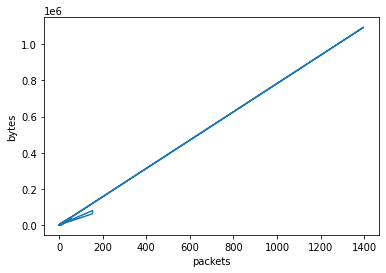

In [229]:
plt.plot(df["packet_count"], df["byte_count"])
plt.xlabel("packets")
plt.ylabel("bytes")
plt.show()